# Explore here

   duration_ms           name  popularity
0     1.983583          Mmhmm          79
1     1.573767  Back On My BS          78
2     2.281100      Change Me          76
3     2.622950         Levels          76
4     2.202667    The Largest          73
5     2.033333     Mr.Trouble          74
6     2.435550          Texas          73
7     2.490817  PISTOL PACCIN          73
8     2.295267        Whip It          71
9     3.068883            2AM          70


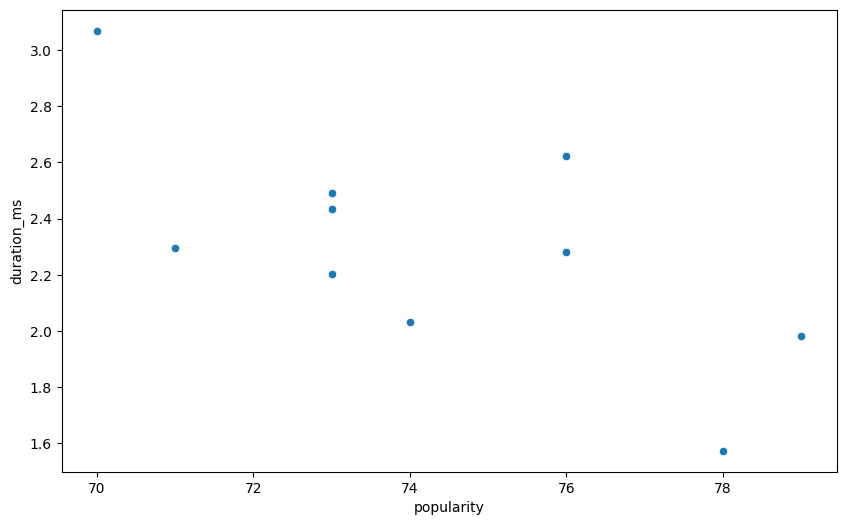

In [2]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import matplotlib.pyplot as plt

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

# Inicializar Spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)
# ID del artista
artist_id = "6qxpnaukVayrQn6ViNvu9I"

# Obtener top 10 canciones
results = sp.artist_top_tracks(artist_id)
tracks = results['tracks']
top_tracks = []
for track in tracks:
    new_track = {}
    for k, v in track.items():
        if k in ["name", "popularity", "duration_ms"]:
            # Transformar el valor de "duration_ms" a minutos
            if k == "duration_ms":
                new_track[k] = (v / (1000 * 60)) % 60
            else:
                new_track[k] = v
    # Agregar el nuevo diccionario a la lista de resultados
    top_tracks.append(new_track)
# Transformar a dataframe
tracks_df = pd.DataFrame(top_tracks)
tracks_df.sort_values(by = 'popularity', ascending = False)
tracks_df = tracks_df.reset_index(drop = True)
print(tracks_df.head(10))

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")


No existe una relación entre la duración y la popularidad